各相关和关联系数在不同数据集上的计算效果对比展示

In [1]:
import numpy as np
import sys
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../" * 2))
sys.path.insert(0, BASE_DIR)

from giefstat.estimate import cal_assoc
from setting import plt

Use environmental variables in default.yml


In [2]:
def plot_scatters(x, y, n_rows, n_cols, n_plot, xlim=(-4, 4), ylim=(-4, 4)):
    """绘制x, y样本的散点图, 同时计算对应的关联系数"""

    # 计算关联系数
    pearson_corr = cal_assoc(x, y, method="PearsonCorr")
    spearman_corr = cal_assoc(x, y, method="SpearmanCorr")
    dist_corr = cal_assoc(x, y, method="DistCorr")
    mi_cut = cal_assoc(x, y, method="MI-cut")
    mi_qcut = cal_assoc(x, y, method="MI-qcut")
    mi_knn = cal_assoc(x, y, method="MI-GIEF", k=3, xtype="c", ytype="c")
    mic = cal_assoc(x, y, method="MIC")
    # r2 = exec_model_predict(x, y)

    ax = plt.subplot(n_rows, n_cols, n_plot, xlim=xlim, ylim=ylim)
    ax.set_title(
        "PearsonCorr = %.1f\n SpearmanCorr = %.1f\n DistCorr = %.1f\n MI-cut = %.1f \n MI-qcut = %.1f \n MI-Kraskov = %.1f\n MIC = %.1f" % (
            pearson_corr, spearman_corr, dist_corr, mi_cut, mi_qcut, mi_knn, mic), fontsize=12
    )
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.scatter(x, y, s=1)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax


def rotation(xy, t):
    m = [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]]
    return np.dot(xy, m)

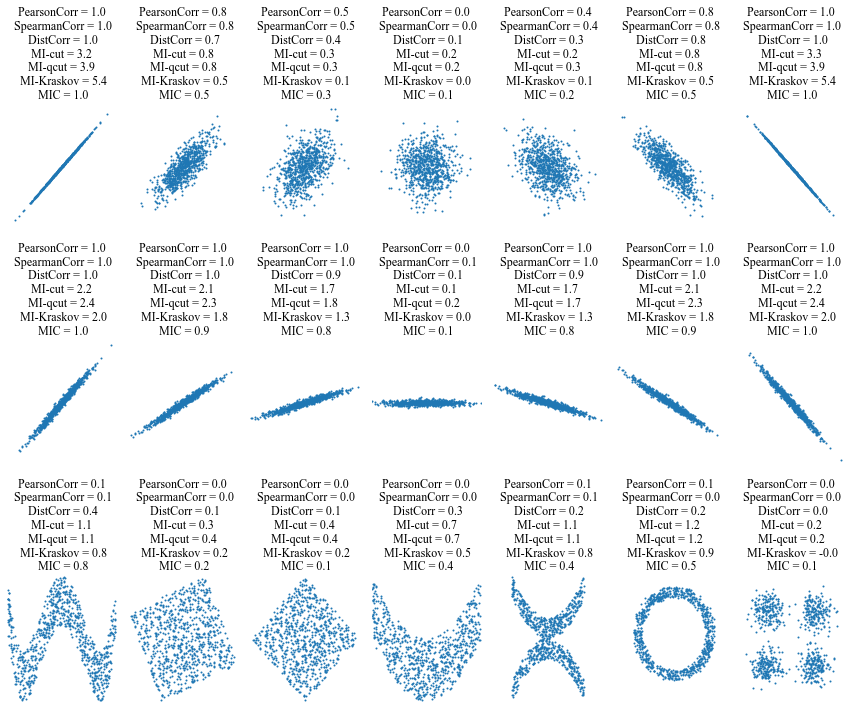

In [3]:
plt.figure(facecolor='white', figsize=(12, 10))

# ---- 第一行 -----------------------------------------------------------------------------------

n = 800
cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
for i, cor in enumerate(cors):
    cov = [[1, cor], [cor, 1]]
    xy = np.random.multivariate_normal([0, 0], cov, n)
    plot_scatters(xy[:, 0], xy[:, 1], 3, 7, i + 1)

# ---- 第二行 -----------------------------------------------------------------------------------

n = 800
ts = [0, np.pi / 12, np.pi / 6, np.pi / 4, np.pi / 2 - np.pi / 6, np.pi / 2 - np.pi / 12,
        np.pi / 2]
cov = [[1, 0.99], [0.99, 1]]
xy = np.random.multivariate_normal([0, 0], cov, n)
for i, t in enumerate(ts):
    xy_r = rotation(xy, t)
    plot_scatters(xy_r[:, 0], xy_r[:, 1], 3, 7, i + 8)

# ---- 第三行 -----------------------------------------------------------------------------------

n = 800

# W形
x = np.random.uniform(-1, 1, n)
y = 4 * (x**2 - 0.5)**2 + np.random.uniform(-1, 1, n) / 3
plot_scatters(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

# 斜四边形
y = np.random.uniform(-1, 1, n)
xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
xy = rotation(xy, -np.pi/8)
lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
plot_scatters(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

# 菱形
xy = rotation(xy, -np.pi/8)
lim = np.sqrt(2)
plot_scatters(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

# 二次曲线
y = 2*x**2 + np.random.uniform(-1, 1, n)
plot_scatters(x, y, 3, 7, 18, (-1, 1), (-1, 3))

# X形
y = (x**2 + np.random.uniform(0, 0.5, n)) * np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plot_scatters(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

# 圆圈
y = np.cos(x * np.pi) + np.random.uniform(0, 1 / 4, n)
x = np.sin(x * np.pi) + np.random.uniform(0, 1 / 4, n)
plot_scatters(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

# 四聚类
xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], n // 4)
xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], n // 4)
xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], n // 4)
xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], n // 4)
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
plot_scatters(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.tight_layout()